# Imports

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import DataFrameCreationMethods as cdf
import plottingMethods as pm
from datetime import datetime

# Updating Angle Data (reformatting global frame)

In [29]:
stevie_angleData_dir = homePath / 'Stevie_Nicks' / 'Stevie_Nicks_base_DTC' / 'Stevie_Nicks_AngleData_base_DTC_ZeroPadded'

In [30]:
dfPaths = [csv for csv in sorted(stevie_angleData_dir.iterdir())] # if csv.suffix =='.csv']



In [31]:
frames_per_chunk = 60 * 60 * 120

In [33]:
for i, path in enumerate(sorted(dfPaths)):
    angle_df = pd.read_csv(path)
    
    angle_df['global frame'] = i*frames_per_chunk + angle_df['chunk frame']
    
    angle_df.to_csv(path)

PermissionError: [Errno 13] Permission denied: 'I:\\Ganglia_Tracker_Data\\Stevie_Nicks\\Stevie_Nicks_base_DTC\\Stevie_Nicks_AngleData_base_DTC_ZeroPadded\\20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum23_001.csv'


# Prepping Data Analysis

### Prepping Plotting Main Method Inputs

In [22]:
homePath = Path(r'I:\Ganglia_Tracker_Data')

rhopalia_position_path = homePath /'Rhopalia_Positions.csv'

rhopalia_positions = pd.read_csv(rhopalia_position_path)

In [3]:
rhopaliaDF = rhopalia_positions.loc[(rhopalia_positions['Jellyfish']=='Stevie')]
rhopaliaDF

,Jellyfish,Rhopalia Label,Rhopalia Position,Removed,Orientation Rho
196,Stevie,1,12.685,NO,YES
197,Stevie,2,33.745,NO,NO
198,Stevie,3,56.480,NO,NO
199,Stevie,4,73.731,NO,NO
200,Stevie,5,88.580,NO,NO
201,Stevie,6,112.074,NO,NO
202,Stevie,7,140.068,NO,NO
203,Stevie,8,165.784,NO,NO
204,Stevie,9,194.962,NO,NO
205,Stevie,10,219.415,NO,NO


In [4]:
rhopos = rhopaliaDF['Rhopalia Position'].tolist()
rholab = rhopaliaDF['Rhopalia Label'].tolist()

### Path specification

In [5]:
recName = 'Stevie_Nicks'

jellyPath = homePath / 'Stevie_Nicks'

complexDFPath = jellyPath / '{}_complexDF.csv'.format(jellyPath.name)

figurePath = cdf.makeOutDir(jellyPath, 'figures')

figurePath_DTC_slice = cdf.makeOutDir(jellyPath, 'figures_DTC_Slice')

figurePath_base_slice = cdf.makeOutDir(jellyPath, 'figures_base_Slice')


recPath_DTC = jellyPath / 'Stevie_Nicks_DTC'

orientation_DTC_DFPath = recPath_DTC / 'Stevie_orient_DTC.csv'

orientationData_DTC = pd.read_csv(orientation_DTC_DFPath)

angleDataPath_DTC = recPath_DTC / 'Stevie_Nicks_AngleData_DTC'


recPath_Base = jellyPath / 'Stevie_Nicks_base'

orientation_Base_DFPath = recPath_Base / 'Stevie_orient_base.csv'

orientationData_Base = pd.read_csv(orientation_Base_DFPath)

angleDataPath_Base = recPath_Base / 'Stevie_Nicks_AngleData_base'

complexDFPath = jellyPath / '{}_complexDF.csv'.format(jellyPath.name)


# Running Data Analysis

### Running CreateComplexDF

In [6]:
complexDF_base = cdf.createComplexDF(angleDataPath_Base,
                                orientationData_Base,
                                rhopaliaDF,
                                120,
                                datetime(2021,2,5,16,40),
                                False)

median_ipi = complexDF_base.InterpulseInterval_After.median()

complexDF_DTC = cdf.createComplexDF(angleDataPath_DTC,
                                orientationData_DTC,
                                rhopaliaDF,
                                120,
                                datetime(2021,2,5,16,40),
                                False,
                                median_ipi)



In [7]:
median_ipi

0.675

In [8]:
concatDF = pd.concat([complexDF_base, complexDF_DTC])

In [9]:
concatDF['chunk name'].unique()

array(['20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum0',
       '20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum10',
       '20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum11',
       '20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum12',
       '20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum13',
       '20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum14',
       '20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum15',
       '20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum16',
       '20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum17',
       '20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum18',
       '20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum19',
       '20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum1',
       '20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum20',
       '20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum21',
       '20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum22',
       '20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum23',
       '20210205_440pm_Stevie_Nicks_Baseli

In [10]:
concatDF.ZeitgeberDay.unique()

array([5, 6, 7], dtype=object)

In [11]:
figurePath

WindowsPath('I:/Ganglia_Tracker_Data/Stevie_Nicks/figures')

In [12]:
concatDF = concatDF.sort_values(by=['ZeitgeberTime'])

### Running plotting main method

I:\DataAnalysis\figures.py:372: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['xaxis'] = df['ZeitgeberTime'].apply(lambda dt: dt2int(dt)).tolist()
I:\DataAnalysis\figures.py:536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfQuery['bounded angle'] = dfQuery['bounded angle'].apply(lambda x: int(x))
No handles with labels found to put in legend.
I:\DataAnalysis\plottingMethods.py:1204: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earli

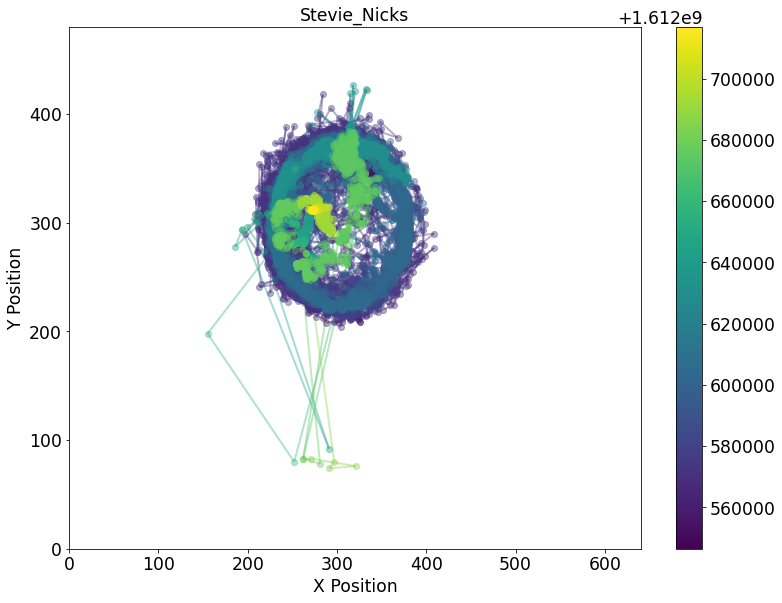

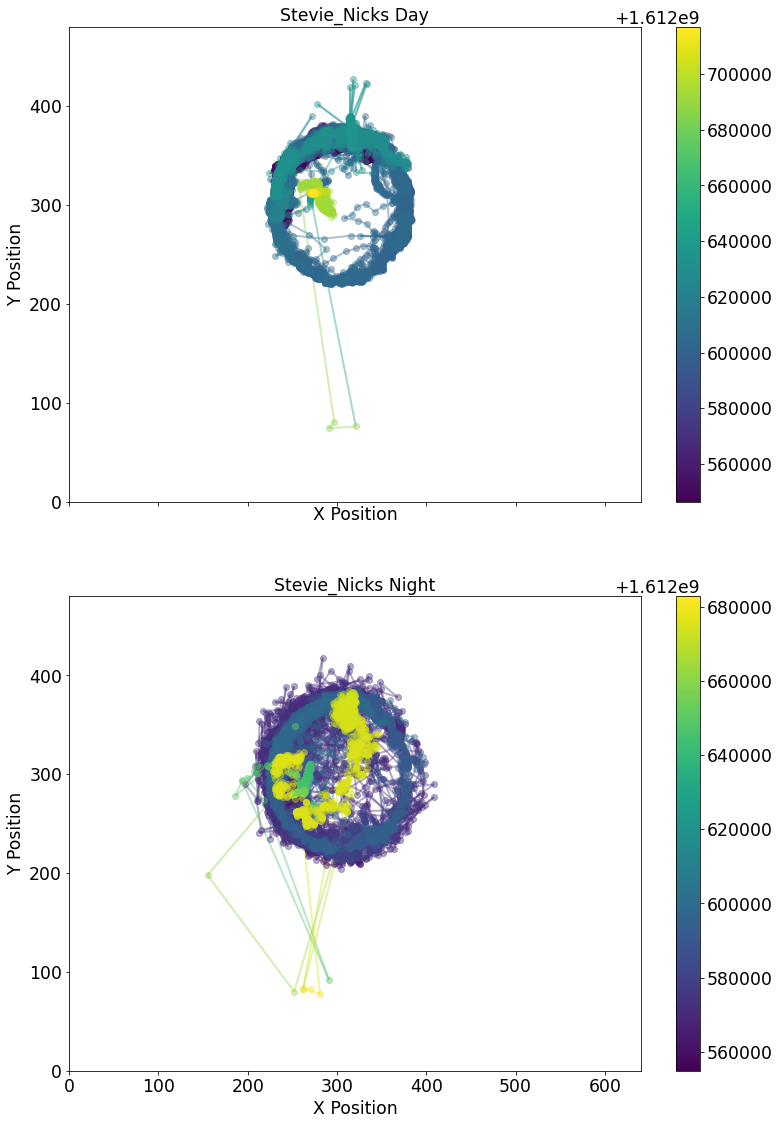

In [13]:
pm.main(recName, figurePath, concatDF, rhopos, rholab, histogram_constraints=[0,0.025])

I:\DataAnalysis\plottingMethods.py:1347: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfComplex['ZeitgeberTime'] = pd.to_datetime(
I:\DataAnalysis\figures.py:372: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['xaxis'] = df['ZeitgeberTime'].apply(lambda dt: dt2int(dt)).tolist()
I:\DataAnalysis\figures.py:536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

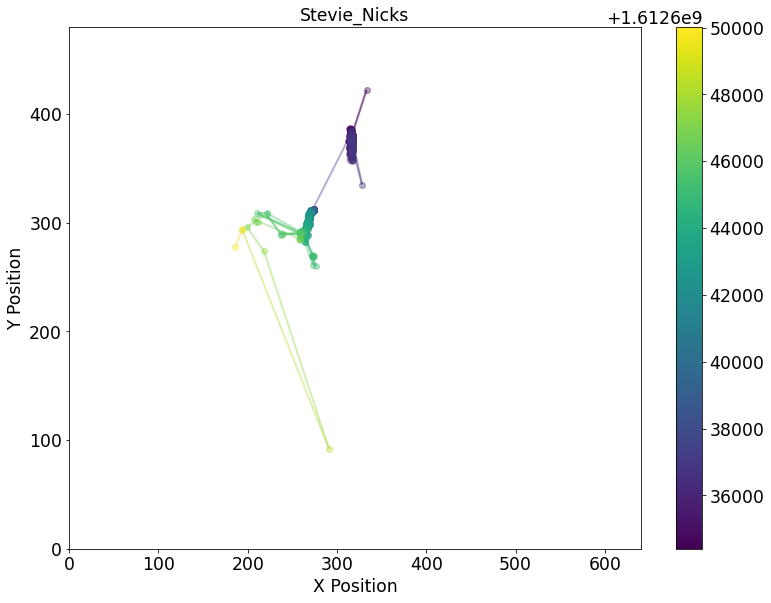

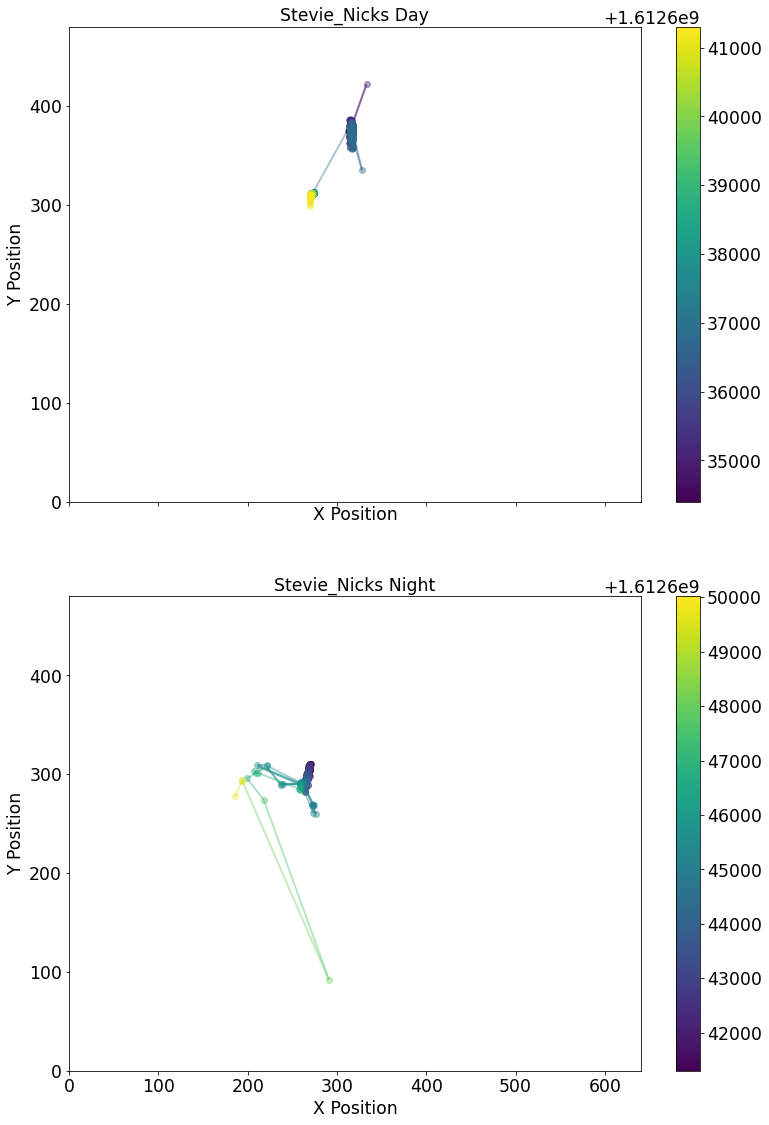

In [14]:
complexDFslice_DTC = concatDF[(concatDF.ZeitgeberDay == 6) & (concatDF.ZeitgeberHour.isin(range(10,15)))]

pm.main(recName, figurePath_DTC_slice, complexDFslice_DTC, rhopos, rholab, stdXlen = 20, histogram_constraints=[0,0.025])

In [15]:
complexDFslice_DTC[['PulseRate_After', 'ZeitgeberTime']].tail()

,PulseRate_After,ZeitgeberTime
713,0.0296443,2021-02-06 14:11:08.258333
714,0.089955,2021-02-06 14:11:41.991667
715,0.00198216,2021-02-06 14:11:53.108333
716,0.000987167,2021-02-06 14:20:17.608333
717,0.000727551,2021-02-06 14:37:10.608333


I:\DataAnalysis\plottingMethods.py:1347: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfComplex['ZeitgeberTime'] = pd.to_datetime(
I:\DataAnalysis\figures.py:372: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['xaxis'] = df['ZeitgeberTime'].apply(lambda dt: dt2int(dt)).tolist()
I:\DataAnalysis\figures.py:536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

ValueError: zero-size array to reduction operation minimum which has no identity

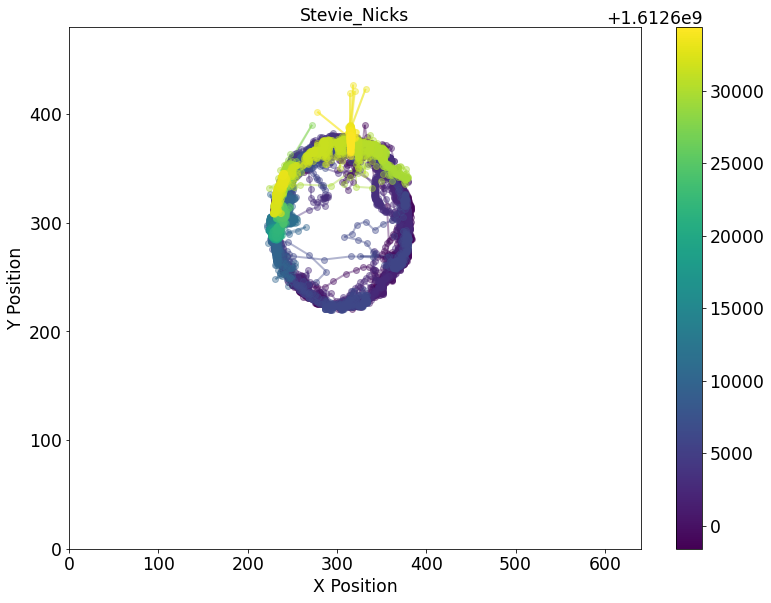

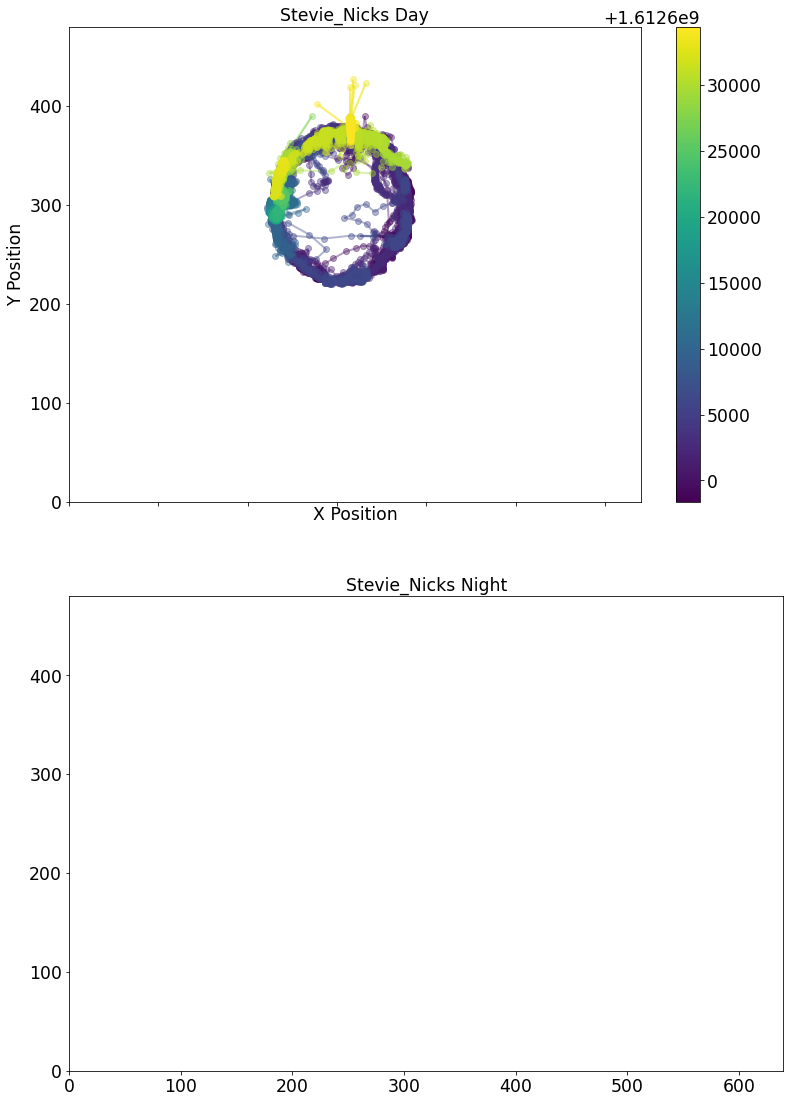

In [16]:
complexDFslice_base = concatDF[(concatDF.ZeitgeberDay == 6) & (concatDF.ZeitgeberHour.isin(range(10)))]

pm.main(recName, figurePath_base_slice, complexDFslice_base, rhopos, rholab, stdXlen = 20, histogram_constraints=[0,0.025])

In [ ]:
test_df = complexDFslice_DTC[['ZeitgeberTime', 'PulseRate_After']]

In [ ]:
test_df = test_df.set_index('ZeitgeberTime')

In [ ]:
test_df.plot()

### Runnning Validation

In [ ]:
usage_df = concatDF[['ZeitgeberTime']].copy()

usage_df['ZeitgeberTime'] = pd.to_datetime(
        usage_df['ZeitgeberTime'],
        format='%Y-%m-%d %H:%M:%S')

usage_df['bins'] = 1

usage_df = usage_df.set_index('ZeitgeberTime')

In [ ]:
pulse_counts = usage_df.resample('H').sum()

In [ ]:
for row in pulse_counts.iterrows():
    print(row)

In [21]:
concatDF["Day.Hour"] = concatDF["ZeitgeberDay"].astype(str) + str('.') + concatDF["ZeitgeberHour"].astype(str)

uniqueCombos = concatDF["Day.Hour"].unique()

for combo in uniqueCombos:
    filterDF = concatDF[concatDF['Day.Hour']==combo]
    print(combo)
    print(filterDF['chunk name'].unique())
    print()

5.9
['20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum0'
 '20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum1']

5.10
['20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum1'
 '20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum10']

5.11
['20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum10'
 '20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum11']

5.12
['20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum11'
 '20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum12']

5.13
['20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum12'
 '20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum13']

5.14
['20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum13'
 '20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum14']

5.15
['20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum14'
 '20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum15']

5.16
['20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum15'
 '20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum16']

5.17
['20210205_440pm_Stevie_Nicks_Baseline_cam2vidnum16'
 '20210205_440pm_Stevie_Nicks_Baseline_cam